# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Corey Stephens

***

This assignment is due on Moodle by **5pm on Friday April 20th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

Stevey's null hypothesis is making a statement about the *sample mean*, $\bar X$, when he should be investigating the *population mean*, $\mu$.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

A null hypothesis is always that some value is *equal* to something, not less than it. It is the alternative hypothesis that states the two values are different.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

Oh boy Stevey... $\alpha = 0.05$ is a confidence level, not a test statistic, and thus we cannot directly compare it to our normalized test statistic. Here he has two options: calculate a p-value for $z=-1.35$ and compare *that* to $\alpha$, or calculate the value of $z$ from the standard normal distribution which has $0.05%$ of the probability mass below it. If the p-value is less than $0.05$, or the value of $z$ with $CDF(Z)=0.05$ is greater than Stevey's test statistic $z=-1.35$, then he can conclude that there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of customers is less than 30.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

Almost, but not quite... A p-value of $0.03$ indicates two things: $3\%$ of the probability mass in the standard normal distribution lies to the left of the test statistic, and there is a $3\%$ chance of observing this mean under the assumption that the null hypothesis is true.

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

Scientists are using p-values as a means of discerning whether or no a hypothesis is true given the data that they have collected, which is essentially the opposite of what a p-value actually indicates. Researches also often use p-values as an idicator of how likely their results were to be produced by random chance, which is somewhat closer to the actual definition of p-values but still far from accurate.

P-values only provide one piece of information about a dataset: the likelihood of the data being observed under a given hypothesis. The validity of the p-value as a measure of truth depends far more on the formulation of the hypothesis it is testing than on the data it is computed from. The general consensus among the panel of experts discussing the matter was that researchers and scientists need to stop treating p-values as the final word on the truth of a hypothesis, and instead learn to use it as just one of many tools statistics provides for analyzing and interpeting data.

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. 

In [3]:
np.random.seed(1235)
dfP = pd.read_csv("data/pizza.csv")

In [4]:
dfP.head(20)

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2
5,Thursday,01-May-14,21.727466,Melissa,Centre,Bruno,53.715391,61.8,4
6,Thursday,01-May-14,38.394169,Laura,West,Bruno,60.266862,57.9,3
7,Thursday,01-May-14,22.186179,Melissa,West,Mario,61.187654,35.8,2
8,Thursday,01-May-14,35.324994,Laura,Centre,Mario,64.204093,36.6,2
9,Thursday,01-May-14,34.015280,Melissa,Centre,Bruno,67.383452,44.8,5


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

Let $t$ be a random variable representing the time it takes for an order to be delivered. Let $\mu_t$ represent the expected delivery time.

$$
H_0: \mu_t = 30 \\
H_1: \mu_t < 30
$$

In [5]:
# Calculate necessary statistical measures
t = dfP['time']
tbar = np.mean(t)
tvar = np.var(t)
alpha = 0.05

# Normalize the test statistic and compute a p-value
zbar = (tbar - 30) / np.sqrt(tvar/len(t))
pval = stats.norm.cdf(zbar)

print("alpha = {:.5f}".format(alpha))
print("p-val = {:.5f}".format(pval))

alpha = 0.05000
p-val = 0.00076


Since the p-value of $0.0008$ is less than the confidence level $0.05$, there is sufficient statistical evidence to conclude that $\mu_t < 30$.

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

Let $f$ be a random variable represending the delivery temperature of a pizza in degrees Farenheit. Let $\mu_f$ represent the expected delivery temperature.

$$
H_0: \mu_f = 65 \\
H_1: \mu_f > 65
$$

In [6]:
# Calculate necessary statistical measures
f = dfP['temperature']
fbar = np.mean(f)
fvar = np.var(f)
alpha = 0.05

# Normalize the test statistic and compute a confidence interval
zao2 = stats.norm.ppf(1-alpha/2)
margin = zao2 * np.sqrt(fvar / len(f))
minCI = fbar - margin
maxCI = fbar + margin
print('95% CI: [{:.3f}, {:.3f}]'.format(minCI, maxCI))

95% CI: [64.885, 65.664]


Because the 95% confidence interval contains the value 65, there is not enough statistical evidence to say that the mean delivery temperature is greater than 65.

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

Let $t_m$ and $f_m$ be random variables representing the delivery time and temperature, respectively, for Mario. Let $t_l$ and $f_l$ represent the same for Luigi. Let $\mu_{t_m}, \mu_{f_m}, \mu_{t_l}, \mu_{f_l}$ represent the expected values for each of these random variables.

$$
\text{For delivery time:} \\
H_0: \mu_{t_m} = \mu_{t_l} \\
H_1: \mu_{t_m} \ne \mu_{t_l}
$$

$$
\text{For delivery temperature:} \\
H_0: \mu_{f_m} = \mu_{f_l} \\
H_1: \mu_{f_m} \ne \mu_{f_l}
$$

In [7]:
alpha = 0.05

# Delivery time
tm = dfP.loc[dfP['driver'] == 'Mario']['time']
tl = dfP.loc[dfP['driver'] == 'Luigi']['time']
tmbar = np.mean(tm)
tlbar = np.mean(tl)
tmvar = np.var(tm)
tlvar = np.var(tl)

# Calculate a confidence interval for the difference between means
zao2 = stats.norm.ppf(1-alpha/2)
margin = zao2 * np.sqrt(tmvar/len(tm) + tlvar/len(tl))
diff = tmbar - tlbar
minCI = diff - margin
maxCI = diff + margin

print('95% CI for time: [{:.3f}, {:.3f}]'.format(minCI, maxCI))


# Delivery Temperature
fm = dfP.loc[dfP['driver'] == 'Mario']['temperature']
fl = dfP.loc[dfP['driver'] == 'Luigi']['temperature']
fmbar = np.mean(fm)
flbar = np.mean(fl)
fmvar = np.var(fm)
flvar = np.var(fl)

# Calculate CI for difference
margin = zao2 * np.sqrt(fmvar/len(fm) + flvar/len(fl))
diff = fmbar - flbar
minCI = diff - margin
maxCI = diff + margin

print('95% CI for temperature: [{:.3f}, {:.3f}]'.format(minCI, maxCI))

95% CI for time: [-1.155, 1.161]
95% CI for temperature: [-2.068, 0.709]


Because the 95% confidence interval for delivery time contains zero, there is not enough statistical evidence to conclude that there is a difference between the expected delivery times of Mario and Luigi.

Likewise, the 95% CI for delivery temperature contains zero, so there is also not enough statistical evidence to conclude that there is a difference between the expected delivery temperatures of Mario and Luigi.

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

let $\hat p_s$ represent the proportion of Salvatore's deliveries which take longer than 40 minutes to deliver.

$$
H_0: \hat p_s = 0.05 \\
H_1: \hat p_s > 0.05 \\
$$

In [9]:
alpha = 0.05

# Find proportion of deliveries which take over 40 mins
s = dfP.loc[dfP['driver'] == 'Salvatore']
total_deliveries = len(s)
gr40 = len(s.loc[s['time'] > 40])
phat = gr40 / total_deliveries

# Calculate a CI
zao2 = stats.norm.ppf(1-alpha/2)
margin = zao2 * np.sqrt((phat*(1-phat)) / total_deliveries)
minCI = phat - margin
maxCI = phat + margin
print("95% CI: [{:.3f}, {:.3f}]".format(minCI, maxCI))

95% CI: [0.031, 0.079]


Because the $95\%$ confidence interval contains the value $0.05$, there is not enough statistical evidence to conclude that more than $5\%$ of Salvatore's deliveries take more than 40 minutes to deliver.

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

$$
\text{CI} = \bar X ± t_{\alpha/2, n-1} \frac{s}{\sqrt n}
$$

In [12]:
alpha = 0.05

nap_bar = 15.5
nap_s = 3.2
n = 12
tao2 = stats.t.ppf(1-alpha/2, n-1)
margin = tao2 * (nap_s / np.sqrt(n))

minCI = nap_bar - margin
maxCI = nap_bar + margin
print("95% CI for nappers: [{:.1f}, {:.1f}]".format(minCI, maxCI))

95% CI for nappers: [13.5, 17.5]


**Part B**: Is there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

$$
\text{CI} = (\bar X_{nap} - \bar X_{coffee}) ± t_{\alpha/2, n-1} \sqrt{ \frac{s_{nap}^2}{n} + \frac{s_{cofee}^2}{n}}
$$

In [14]:
alpha = 0.05

coffee_bar = 12.25
coffee_s = 3.1
margin = np.sqrt( (nap_s**2)/n + (coffee_s**2)/n )
diff = nap_bar - coffee_bar

minCI = diff - margin
maxCI = diff + margin
print("95% CI for difference: [{:.1f}, {:.1f}]".format(minCI, maxCI))

95% CI for difference: [2.0, 4.5]


Because the $95\%$ confidence interval for the difference between mean words remembered after a nap and after coffee does *not* contain $0$, there is sufficient statistical evidence to say that naps are more beneficial to memory recall than coffee.

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

$$
\text{CI} = \sqrt{ \frac{(n-1)s^2}{\chi_{\alpha/2, n-1}^2} } < \sigma < \sqrt{ \frac{(n-1)s^2}{\chi_{1-\alpha/2, n-1}^2 }}
$$

In [18]:
alpha = 0.05

chi_lo = stats.chi2.ppf(alpha/2, n-1)
chi_hi = stats.chi2.ppf(1-alpha/2, n-1)
numerator = (n-1) * coffee_s**2

minCI = np.sqrt(numerator / chi_hi)
maxCI = np.sqrt(numerator / chi_lo)
print("95% CI for std of coffee: [{:.1f}, {:.1f}]".format(minCI, maxCI))

95% CI for std of coffee: [2.2, 5.3]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [57]:
dfAd = pd.read_csv("data/email.csv")
dfAd.head()

,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

Let $P_J$ represent the click-through rate of Johnny's ad and $P_S$ represent the click-through rate of the standard mailer.

$$
H_0: P_J = P_S \\
H_1: P_J > P_S
$$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

$$
Z = \frac{ \hat P_J - P_S }{ \sqrt{\frac{P_S (1-P_S)}{n}} }
$$

In [53]:
alpha = 0.05

n = dfAd['Sent'].sum()
clicked = dfAd['Clicked'].sum()
pj = clicked / n
ps = 0.05

z = (pj - ps) / np.sqrt((ps*(1-ps)) / n)
pval = stats.norm.cdf(z)
print("p-value: {:.3f}".format(pval))

p-value: 0.776


Because the p-value is not less than the $\alpha$ significance level of $0.05$, Johnny can not conclude that his ad campaing is an improvement.

**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [59]:
alpha = 0.05
groups = dfAd['Group'].unique()
sig_groups = []

for g in groups:
    group = dfAd.loc[dfAd['Group'] == g]
    
    n = group['Sent'].sum()
    clicked = group['Clicked'].sum()
    pj = clicked / n
    ps = 0.05
    
    z = (pj - ps) / np.sqrt((ps*(1-ps)) / n)
    pval = stats.norm.cdf(z)
    print("p-val for group {:d}: {:.3f}".format(g, pval))

p-val for group 1: 0.261
p-val for group 2: 0.658
p-val for group 3: 0.739
p-val for group 4: 0.866


### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [60]:
dfAuto = pd.read_csv("data/auto.csv")
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [68]:
bhat, ahat, rval, pval, std = stats.linregress(dfAuto['horsepower'], dfAuto['mpg'])
print("Y = {:.1f} - {:.3f}x".format(ahat, np.abs(bhat)))

Y = 39.9 - 0.158x


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


Text(0,0.5,'Miles per Gallon')

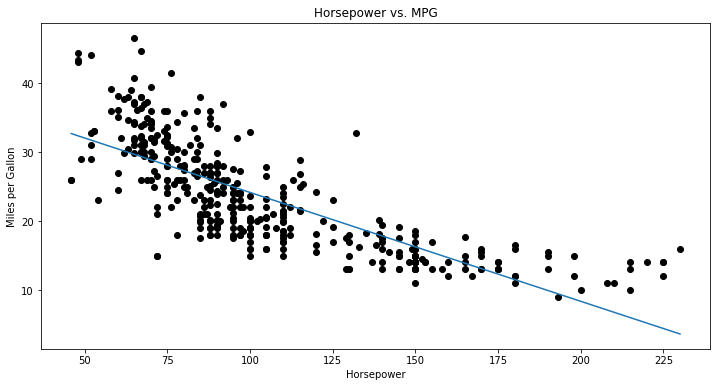

In [77]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(dfAuto['horsepower'], dfAuto['mpg'], color='black')

x = np.linspace(dfAuto['horsepower'].min(), dfAuto['horsepower'].max())
ax.plot(x, ahat + bhat*x)

ax.set_title('Horsepower vs. MPG')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

The relationship between horsepower and MPG is negative because the slope $\hat \beta < 0$.

In [78]:
print(bhat)

-0.157844733354


**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

$$
\hat \beta ± z_{\alpha/2} \frac{\sigma}{n}
$$

In [85]:
alpha = 0.05
zao2 = stats.norm.ppf(1-alpha/2)
sig = np.std(dfAuto['mpg'] / dfAuto['horsepower'])
n = len(dfAuto)
margin = zao2 * sig / np.sqrt(n)

minCI = bhat - margin
maxCI = bhat + margin
print("95% CI: [{:.3f}, {:.3f}]".format(minCI, maxCI))

95% CI: [-0.174, -0.141]


**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

$$
H_0: \beta = 0 \\
H_1: \beta \ne 0
$$

Because the (previously stated) confidence interval does not contain $0$, there is sufficient statistical evidence to conclude that MPG is a response variable for horsepower.

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [79]:
ahat + bhat * 97

24.624921885866065